In [22]:
import base64

def encode_image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
    return encoded_string

encoded_image = encode_image_to_base64("undirectedgraph.png")
print("img of undirected graph:",encoded_image)

encoded_image = encode_image_to_base64("directedgraph.png")
print("img of directed graph:",encoded_image)

img of undirected graph: iVBORw0KGgoAAAANSUhEUgAAA0UAAAG/CAYAAACXEXzjAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAHX/SURBVHhe7d0HfNx1/cfxT5smaZKme5fuXQplj8reMkSGsreIsgRRBAQZCigCf0RB2QqyRGXIECl7U2gpXXTvke42abN7/+/7m/uVNL2kl+Quudzv9ezj90iau/vdb95937/v+LWKOAYAAAAAIdU6+hMAAAAAQolQBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1QBAAAACDUCEUAAAAAQo1

# Project on Graph Neural Networks

### 1.0 Introduction:  What are Graph Neural Networks? 
**With two or three words...**

The primary objective of this project is to provide a thorough understanding of Graph Neural Networks, from their basic principles to their advanced applications.

Graph Neural Networks are a class of neural networks specifically designed to work with graph-structured data. Traditional neural networks, such as Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs), excel in handling grid-like data structures like images and sequences. However, many real-world data sets naturally form graphs, where relationships between entities (nodes) are represented by edges. Examples include social networks, molecular structures, transportation networks, and recommendation systems.

GNNs are powerful because they can leverage the inherent relational information in graphs to make predictions, classify nodes, generate embeddings, and more. They have become crucial for tasks where understanding the structure and connectivity of data is essential.

### 1.1 Basics of Graph Theory

**What are graphs?**

Graphs are powerful structures that can model complex relationships and interactions in a variety of fields. A graph is a non-linear kind of data structure made up of nodes or vertices and edges. The edges connect any two nodes in the graph, and the nodes are also known as vertices.

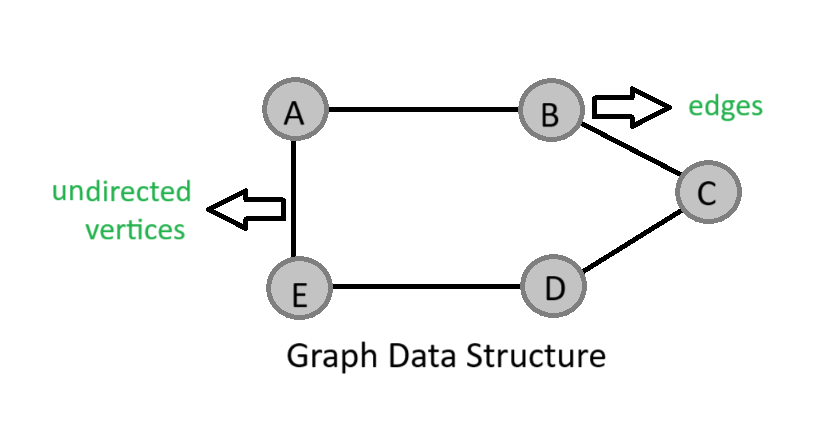

**Types of graphs**

Directed vs. Undirected Graphs:

* Directed Graph (Digraph): Each edge has a direction, indicated by an arrow, showing the relationship flows from one node to another (e.g., $A \rightarrow B$). This is useful for representing asymmetric relationships such as follower-following relationships on social media.

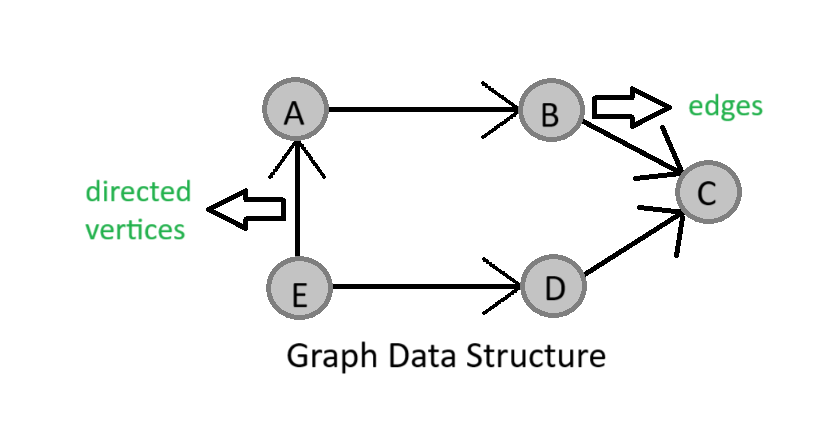

* Undirected Graph: Edges do not have a direction, indicating a bidirectional relationship (e.g., $A−B$). This is used for symmetric relationships like friendships.

Weighted vs. Unweighted Graphs:

* Weighted Graph: Each edge has an associated weight or cost, representing the strength, distance, or capacity of the connection. For example, in a transportation network, weights could represent distances between cities.

* Unweighted Graph: All edges are considered equal, with no weights assigned. These graphs simply represent connectivity without quantifying the connections.


Simple vs. Multigraphs:

* Simple Graph: A graph with no loops (edges connecting a node to itself) and no more than one edge between any pair of nodes.

* Multigraph: A graph that can have multiple edges (parallel edges) between the same pair of nodes.

Some properties of graphs that are of importance are the Degree of a node and the Adjacency matrix

The degree of a node is the number of edges connected to it.  In a directed graph, each node has an in-degree (number of incoming edges) and an out-degree (number of outgoing edges). 

The adjacency matrix is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of nodes are adjacent or not in the graph. For an undirected graph the matrix is symmetric, meaning if node A is connected to node B, then node B is also connected to node A. In a directed graph, the matrix is not necessarily symmetric.

-------------------------------------------------------------------------

In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid, TUDataset
from torch_geometric.transforms import NormalizeFeatures, AddSelfLoops
from torch_geometric.nn import BatchNorm, GCNConv, global_mean_pool
from torch_geometric.utils import negative_sampling, train_test_split_edges, to_networkx
from torch_geometric.data import DataLoader
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import networkx as nx
from networkx.algorithms import community
import collections
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, random_split


# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create data directory
data_dir = "./data"
os.makedirs(data_dir, exist_ok=True)



**The Cora Dataset**

The Cora Dataset consists of 2708 scientific publications classified into one of seven classes. In terms of graph theory, it is one relatively small, simple, undirected and unweighted graph. It is foundational and widely used in graph-based machine learning research but can be considered relatively simplistic compared to more complex or modern datasets

In [24]:
# Load the Cora dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0].to(device)


c:\Users\mikax\anaconda3\envs\new_env\Lib\site-packages\torch_geometric\data\dataset.py:238: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  if osp.exists(f) and torch.load(f)

{3: 818, 4: 426, 0: 351, 2: 418, 1: 217, 5: 298, 6: 180}


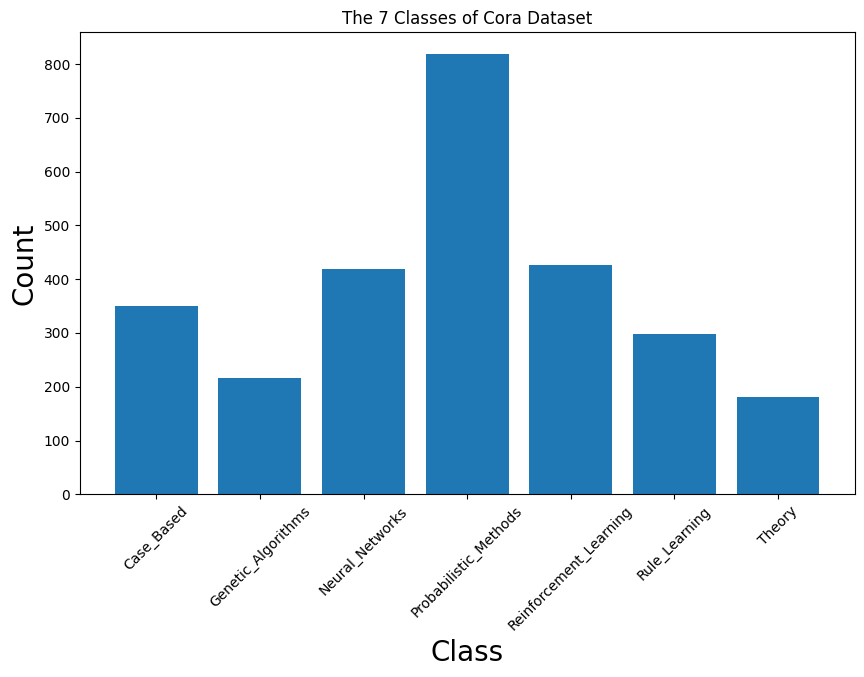

In [25]:
# Corrected dictionary mapping label indices to Cora class names
label_dict = {0:'Case_Based',
 1:'Genetic_Algorithms',
 2:'Neural_Networks',
 3:'Probabilistic_Methods',
 4:'Reinforcement_Learning',
 5:'Rule_Learning',
 6:'Theory'}

# Assuming `data.y` is a tensor or array-like object from which you want to count labels
counter = collections.Counter(data.y.numpy())
counter = dict(counter)

# Print the counts
print(counter)

# Prepare data for plotting
count = [x[1] for x in sorted(counter.items())]
labels = [label_dict[i] for i in sorted(counter.keys())]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(count)), count, tick_label=labels)
plt.xlabel("Class", size=20)
plt.ylabel("Count", size=20)
plt.title("The 7 Classes of Cora Dataset")
plt.xticks(rotation=45)
plt.show()


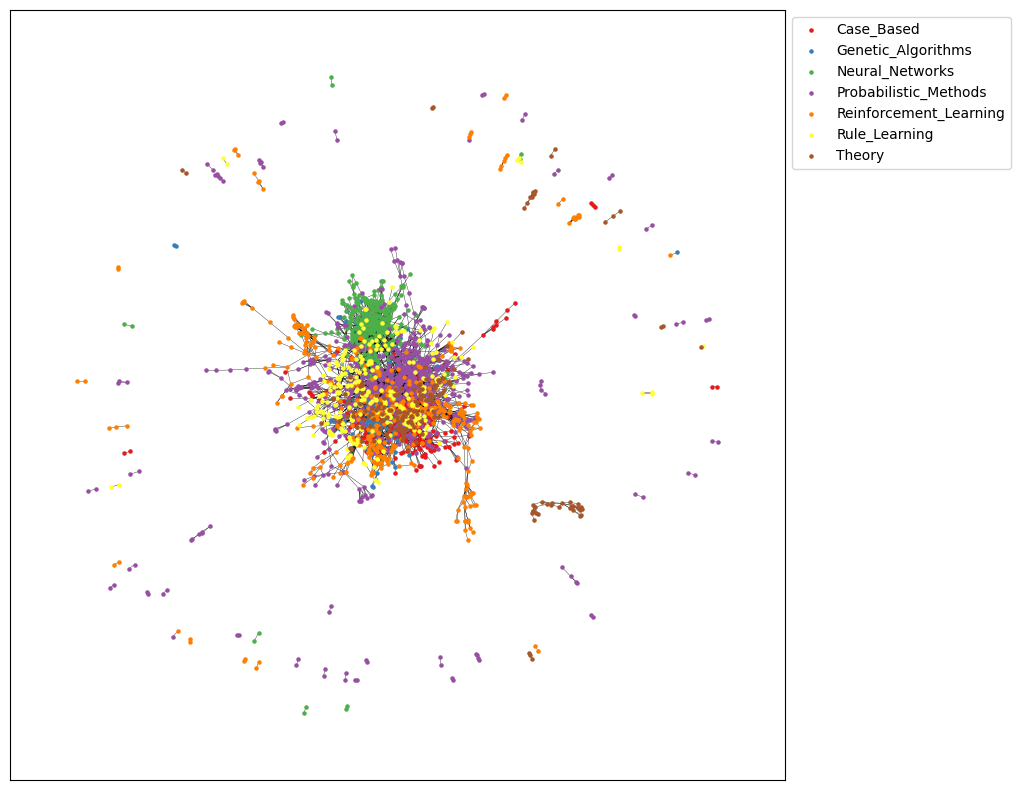

In [26]:
#Graph Visualization using NetworkX
G = to_networkx(data, to_undirected=True)
node_color = []
nodelist = [[], [], [], [], [], [], []]
colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628']
labels = data.y
for n, i in enumerate(labels):
    node_color.append(colorlist[i])
    nodelist[i].append(n)
pos = nx.spring_layout(G, seed = 42)
plt.figure(figsize = (10, 10))
labellist = list(label_dict.values())
for num, i in enumerate(zip(nodelist, labellist)):
    n, l = i[0], i[1]
    nx.draw_networkx_nodes(G, pos, nodelist=n, node_size = 5, node_color = colorlist[num], label=l)
nx.draw_networkx_edges(G, pos, width = 0.25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

In [27]:

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(dataset.num_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

model = GCN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Train the model
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

# Evaluate the model
model.eval()
_, pred = model(data).max(dim=1)
correct = int(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
GCN_Node_accuracy = correct / int(data.test_mask.sum())
print('GCN Node Classification Accuracy: {:.4f}'.format(GCN_Node_accuracy))


GCN Node Classification Accuracy: 0.8070


In [28]:
#Edge Classification using GCN

# Prepare data for edge classification
dataset = Planetoid(root='/tmp/Cora', name='Cora', transform=T.Compose([
    T.AddSelfLoops(), T.ToDevice(device)
]))

class EdgeClassifier(torch.nn.Module):
    def __init__(self):
        super(EdgeClassifier, self).__init__()
        self.conv1 = GCNConv(dataset.num_features, 16)
        self.conv2 = GCNConv(16, 16)
        self.fc = torch.nn.Linear(32, 2)

    def forward(self, data, edge_index):
        x, _ = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

    def decode(self, z, edge_label_index):
        edge_features = torch.cat([z[edge_label_index[0]], z[edge_label_index[1]]], dim=-1)
        return self.fc(edge_features)

model = EdgeClassifier().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Training loop
for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    z = model(data, data.edge_index)
    neg_edge_index = negative_sampling(data.edge_index, num_nodes=data.num_nodes, num_neg_samples=data.edge_index.size(1))
    edge_label_index = torch.cat([data.edge_index, neg_edge_index], dim=-1)
    edge_labels = torch.cat([torch.ones(data.edge_index.size(1)), torch.zeros(neg_edge_index.size(1))], dim=0).to(device)
    out = model.decode(z, edge_label_index)
    loss = F.cross_entropy(out, edge_labels.long())
    loss.backward()
    optimizer.step()

# Evaluation
model.eval()
with torch.no_grad():
    z = model(data, data.edge_index)
    neg_edge_index = negative_sampling(data.edge_index, num_nodes=data.num_nodes, num_neg_samples=data.edge_index.size(1))
    edge_label_index = torch.cat([data.edge_index, neg_edge_index], dim=-1)
    edge_labels = torch.cat([torch.ones(data.edge_index.size(1)), torch.zeros(neg_edge_index.size(1))], dim=0).to(device)
    out = model.decode(z, edge_label_index)
    pred = out.argmax(dim=1)
    correct = pred.eq(edge_labels.long()).sum().item()
    GCN_Edge_accuracy = correct / edge_labels.size(0)
    print('GCN Edge Classification Accuracy: {:.4f}'.format(GCN_Edge_accuracy))


c:\Users\mikax\anaconda3\envs\new_env\Lib\site-packages\torch_geometric\data\dataset.py:238: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  if osp.exists(f) and torch.load(f)

GCN Edge Classification Accuracy: 0.7296


In [29]:
#Node classification using CNN

# Define the CNN model for node classification
class NodeCNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NodeCNN, self).__init__()
        self.conv1 = nn.Conv1d(input_dim, hidden_dim, kernel_size=1)
        self.conv2 = nn.Conv1d(hidden_dim, output_dim, kernel_size=1)
    
    def forward(self, x):
        x = x.unsqueeze(2)  # Add a dimension to make it (batch_size, input_dim, 1)
        x = self.conv1(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x)
        x = x.squeeze(2)  # Remove the added dimension
        return F.log_softmax(x, dim=1)

# Initialize the model, optimizer, and loss function
model = NodeCNN(dataset.num_features, 16, dataset.num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Training the model
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data.x)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

# Evaluate the model
model.eval()
_, pred = model(data.x).max(dim=1)
correct = int(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
CNN_Node_accuracy = correct / int(data.test_mask.sum())
print('CNN Node Classification Accuracy: {:.4f}'.format(CNN_Node_accuracy))


CNN Node Classification Accuracy: 0.5280


In [30]:
#Node classification using MLP

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Initialize the model, optimizer, and loss function
model = MLP(dataset.num_features, 16, dataset.num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Training the model
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data.x)  # Use only node features
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

# Evaluate the model
model.eval()
_, pred = model(data.x).max(dim=1)
correct = int(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
MLP_Node_accuracy = correct / int(data.test_mask.sum())
print('MLP Node Classification Accuracy: {:.4f}'.format(MLP_Node_accuracy))


MLP Node Classification Accuracy: 0.5170


In [31]:
#Link prediction using GCN
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the Cora dataset with edge splits
dataset = Planetoid(root='/tmp/Cora', name='Cora', transform=T.Compose([
    T.NormalizeFeatures(), 
    T.ToDevice(device)
]))
data = dataset[0]

# Prepare the data for edge classification by splitting edges
data = train_test_split_edges(data)  # Splits the edges into train, val, test

class ImprovedEdgeClassifier(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, num_layers=2):
        super(ImprovedEdgeClassifier, self).__init__()
        self.layers = torch.nn.ModuleList()
        self.batch_norms = torch.nn.ModuleList()

        self.layers.append(GCNConv(in_channels, hidden_channels))
        self.batch_norms.append(BatchNorm(hidden_channels))

        for _ in range(num_layers - 1):
            self.layers.append(GCNConv(hidden_channels, hidden_channels))
            self.batch_norms.append(BatchNorm(hidden_channels))
        
        self.fc = torch.nn.Linear(2 * hidden_channels, 64)
        self.fc_out = torch.nn.Linear(64, 2)
        self.dropout = torch.nn.Dropout(p=0.5)

    def forward(self, data):
        x, edge_index = data.x, data.train_pos_edge_index
        for layer, batch_norm in zip(self.layers, self.batch_norms):
            x = layer(x, edge_index)
            x = batch_norm(x)
            x = F.relu(x)
            x = self.dropout(x)
        return x

    def decode(self, z, edge_label_index):
        edge_features = torch.cat([z[edge_label_index[0]], z[edge_label_index[1]]], dim=-1)
        edge_features = F.relu(self.fc(edge_features))
        return self.fc_out(edge_features)

# Initialize the model, optimizer, and loss function
model = ImprovedEdgeClassifier(in_channels=dataset.num_features, hidden_channels=64, num_layers=3).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-4)

# Training loop with early stopping
best_loss = float('inf')
patience = 10
wait = 0

for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    z = model(data)
    
    # Create negative samples for the training set
    neg_edge_index = negative_sampling(
        edge_index=data.train_pos_edge_index, 
        num_nodes=data.num_nodes, 
        num_neg_samples=data.train_pos_edge_index.size(1)
    )
    
    edge_label_index = torch.cat([data.train_pos_edge_index, neg_edge_index], dim=-1)
    edge_labels = torch.cat([torch.ones(data.train_pos_edge_index.size(1)), torch.zeros(neg_edge_index.size(1))], dim=0).to(device)
    
    out = model.decode(z, edge_label_index)
    loss = F.cross_entropy(out, edge_labels.long())
    loss.backward()
    optimizer.step()

    # Early stopping
    if loss.item() < best_loss:
        best_loss = loss.item()
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    z = model(data)
    
    # Negative sampling for test set
    neg_edge_index = negative_sampling(
        edge_index=data.test_pos_edge_index, 
        num_nodes=data.num_nodes, 
        num_neg_samples=data.test_pos_edge_index.size(1)
    )
    
    edge_label_index = torch.cat([data.test_pos_edge_index, neg_edge_index], dim=-1)
    edge_labels = torch.cat([torch.ones(data.test_pos_edge_index.size(1)), torch.zeros(neg_edge_index.size(1))], dim=0).to(device)
    
    out = model.decode(z, edge_label_index)
    pred = out.argmax(dim=1)
    correct = pred.eq(edge_labels.long()).sum().item()
    GCN_Link_accuracy = correct / edge_labels.size(0)
    print('Improved GCN Link Prediction Accuracy: {:.4f}'.format(GCN_Link_accuracy))


c:\Users\mikax\anaconda3\envs\new_env\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


Epoch 10, Loss: 0.6279
Epoch 20, Loss: 0.5592
Epoch 30, Loss: 0.4740
Epoch 40, Loss: 0.3825
Epoch 50, Loss: 0.3224
Epoch 60, Loss: 0.2949
Epoch 70, Loss: 0.2765
Epoch 80, Loss: 0.2668
Epoch 90, Loss: 0.2636
Epoch 100, Loss: 0.2439
Epoch 110, Loss: 0.2340
Epoch 120, Loss: 0.2371
Epoch 130, Loss: 0.2257
Epoch 140, Loss: 0.2248
Epoch 150, Loss: 0.2147
Epoch 160, Loss: 0.2155
Epoch 170, Loss: 0.2049
Epoch 180, Loss: 0.2112
Epoch 190, Loss: 0.2025
Early stopping at epoch 196
Improved GCN Link Prediction Accuracy: 0.7932


In [32]:
#Link Prediction using MLP
# Load the CORA dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

# Split the edges into train and test sets for link prediction
data = train_test_split_edges(data)

# Create edge features by concatenating node features of the connected nodes
def create_edge_dataset(data, edge_index, is_pos_edge=True):
    num_edges = edge_index.size(1)
    
    # Edge features by concatenating node features
    edge_features = [torch.cat([data.x[edge_index[0, i]], data.x[edge_index[1, i]]]) for i in range(num_edges)]
    
    # Labels: 1 for positive edges, 0 for negative edges
    edge_labels = torch.ones(num_edges, dtype=torch.long) if is_pos_edge else torch.zeros(num_edges, dtype=torch.long)
    
    return torch.stack(edge_features), edge_labels

# Create positive edge features and labels
pos_edge_features, pos_edge_labels = create_edge_dataset(data, data.train_pos_edge_index)

# Create negative edge features and labels
neg_edge_index = negative_sampling(data.train_pos_edge_index, num_nodes=data.num_nodes, num_neg_samples=data.train_pos_edge_index.size(1))
neg_edge_features, neg_edge_labels = create_edge_dataset(data, neg_edge_index, is_pos_edge=False)

# Combine positive and negative edge features and labels
train_edge_features = torch.cat([pos_edge_features, neg_edge_features], dim=0)
train_edge_labels = torch.cat([pos_edge_labels, neg_edge_labels], dim=0)

# Shuffle the training dataset
shuffle_indices = torch.randperm(train_edge_features.size(0))
train_edge_features = train_edge_features[shuffle_indices]
train_edge_labels = train_edge_labels[shuffle_indices]

# Repeat the process for the test set
test_pos_edge_features, test_pos_edge_labels = create_edge_dataset(data, data.test_pos_edge_index)
test_neg_edge_index = negative_sampling(data.test_pos_edge_index, num_nodes=data.num_nodes, num_neg_samples=data.test_pos_edge_index.size(1))
test_neg_edge_features, test_neg_edge_labels = create_edge_dataset(data, test_neg_edge_index, is_pos_edge=False)

test_edge_features = torch.cat([test_pos_edge_features, test_neg_edge_features], dim=0)
test_edge_labels = torch.cat([test_pos_edge_labels, test_neg_edge_labels], dim=0)

# Shuffle the test dataset
shuffle_indices = torch.randperm(test_edge_features.size(0))
test_edge_features = test_edge_features[shuffle_indices]
test_edge_labels = test_edge_labels[shuffle_indices]

# Define the MLP model for edge classification
class EdgeMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(EdgeMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Assuming binary edge classification (e.g., predicting existence of edge)
num_classes = 2

# Get the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model, optimizer, and loss function
model = EdgeMLP(2 * dataset.num_features, 64, num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

# Convert edge features and labels to the device
train_edge_features = train_edge_features.to(device)
train_edge_labels = train_edge_labels.to(device)
test_edge_features = test_edge_features.to(device)
test_edge_labels = test_edge_labels.to(device)

# Training the model
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(train_edge_features)
    loss = F.nll_loss(out, train_edge_labels)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    out = model(test_edge_features)
    pred = out.max(dim=1)[1]
    correct = pred.eq(test_edge_labels).sum().item()
    MLP_Link_accuracy = correct / test_edge_labels.size(0)
    print('MLP Link Prediction Accuracy: {:.4f}'.format(MLP_Link_accuracy))


Epoch 10, Loss: 0.5873
Epoch 20, Loss: 0.4897
Epoch 30, Loss: 0.3879
Epoch 40, Loss: 0.3037
Epoch 50, Loss: 0.2462
Epoch 60, Loss: 0.2141
Epoch 70, Loss: 0.1867
Epoch 80, Loss: 0.1733
Epoch 90, Loss: 0.1603
Epoch 100, Loss: 0.1485
Epoch 110, Loss: 0.1400
Epoch 120, Loss: 0.1338
Epoch 130, Loss: 0.1287
Epoch 140, Loss: 0.1239
Epoch 150, Loss: 0.1164
Epoch 160, Loss: 0.1122
Epoch 170, Loss: 0.1085
Epoch 180, Loss: 0.1063
Epoch 190, Loss: 0.1033
Epoch 200, Loss: 0.1001
MLP Link Prediction Accuracy: 0.7922


**The Tudataset Proteins**

Because the Cora dataset is considered one graph, we cannot perform graph classification task with it. Instead we will use the TUDataset PROTEINS. It is one of the datasets provided by TU Dortmund University and is designed for graph-based machine learning tasks. It consists of 1113 protein graphs that are simple and weighted. 

In [33]:
#Graph Classification using Simple NN
# Define the neural network
class ImprovedSimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ImprovedSimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x

# Load the TUDataset
dataset = TUDataset(root='/tmp/PROTEINS', name='PROTEINS')

# Convert graph data to feature vectors
def extract_features(graph):
    # Convert graph to NetworkX format
    nx_graph = to_networkx(graph, to_undirected=True)
    
    # Compute degree centrality
    degrees = np.array([d for _, d in nx_graph.degree()])
    
    if degrees.size == 0:
        # If the graph is empty, return a default feature vector
        return np.array([0, 0, 0, 0])
    
    mean_degree = np.mean(degrees)
    std_degree = np.std(degrees)
    max_degree = np.max(degrees)
    min_degree = np.min(degrees)
    
    # Return features as a 1D numpy array
    return np.array([mean_degree, std_degree, max_degree, min_degree])

# Extract features and labels
features = []
labels = []

for graph in dataset:
    features.append(extract_features(graph))
    labels.append(graph.y.item())

features = np.array(features)
labels = np.array(labels)


# Standardize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# PCA reduction
pca = PCA(n_components=min(10, features.shape[1]))
features = pca.fit_transform(features)

# Split dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define parameters
input_dim = features.shape[1]
hidden_dim = 128
output_dim = len(np.unique(labels))

# Initialize model, loss function, optimizer, and scheduler
model = ImprovedSimpleNN(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.7)

# Convert features and labels to tensors
train_features_tensor = torch.tensor(X_train, dtype=torch.float32)
train_labels_tensor = torch.tensor(y_train, dtype=torch.long)
val_features_tensor = torch.tensor(X_val, dtype=torch.float32)
val_labels_tensor = torch.tensor(y_val, dtype=torch.long)
test_features_tensor = torch.tensor(X_test, dtype=torch.float32)
test_labels_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
train_dataset = TensorDataset(train_features_tensor, train_labels_tensor)
val_dataset = TensorDataset(val_features_tensor, val_labels_tensor)
test_dataset = TensorDataset(test_features_tensor, test_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Training loop with early stopping
num_epochs = 100
best_val_accuracy = 0
patience = 10
counter = 0

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_features, batch_labels in train_loader:
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    
    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_features, batch_labels in val_loader:
            outputs = model(batch_features)
            _, predicted = torch.max(outputs.data, 1)
            total += batch_labels.size(0)
            correct += (predicted == batch_labels).sum().item()

    val_accuracy = correct / total
    print(f'Validation Accuracy: {val_accuracy:.2f}')
    
    # Learning rate scheduler step
    scheduler.step()
    
    # Early stopping
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered")
            break

# Save the model
torch.save(model.state_dict(), 'improved_simple_nn.pth')

# Final Evaluation on Test Set
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

    Simple_NN_graph_accuracy = correct / total
    print(f'Test Accuracy: {Simple_NN_graph_accuracy:.2f}')


Epoch [1/100], Loss: 0.6650
Validation Accuracy: 0.63
Epoch [2/100], Loss: 0.6323
Validation Accuracy: 0.63
Epoch [3/100], Loss: 0.6184
Validation Accuracy: 0.67
Epoch [4/100], Loss: 0.6070
Validation Accuracy: 0.63
Epoch [5/100], Loss: 0.5881
Validation Accuracy: 0.74
Epoch [6/100], Loss: 0.5824
Validation Accuracy: 0.71
Epoch [7/100], Loss: 0.5801
Validation Accuracy: 0.70
Epoch [8/100], Loss: 0.5711
Validation Accuracy: 0.69
Epoch [9/100], Loss: 0.5692
Validation Accuracy: 0.70
Epoch [10/100], Loss: 0.5699
Validation Accuracy: 0.69
Epoch [11/100], Loss: 0.5727
Validation Accuracy: 0.73
Epoch [12/100], Loss: 0.5772
Validation Accuracy: 0.69
Epoch [13/100], Loss: 0.5735
Validation Accuracy: 0.69
Epoch [14/100], Loss: 0.5576
Validation Accuracy: 0.70
Epoch [15/100], Loss: 0.5557
Validation Accuracy: 0.65
Early stopping triggered
Test Accuracy: 0.66


In [34]:
#Graph classification using GCN
# Load the dataset
from torch_geometric.data import DataLoader

dataset = TUDataset(root='/tmp/PROTEINS', name='PROTEINS')

# Split dataset indices into training and test sets
num_nodes = len(dataset)
num_train = int(num_nodes * 0.8)
num_test = num_nodes - num_train

# Use random_split from torch.utils.data
train_dataset, test_dataset = random_split(dataset, [num_train, num_test])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class ImprovedGCN(torch.nn.Module):
    def __init__(self, num_node_features, num_classes):
        super(ImprovedGCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, 64)
        self.conv2 = GCNConv(64, 128)
        self.conv3 = GCNConv(128, 256)
        self.lin1 = torch.nn.Linear(256, 128)
        self.lin2 = torch.nn.Linear(128, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        
        # Global pooling
        x = global_mean_pool(x, batch)
        
        x = F.relu(self.lin1(x))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        
        return F.log_softmax(x, dim=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ImprovedGCN(dataset.num_node_features, dataset.num_classes).to(device)

# Optimizer and Loss Function
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

# Training with Validation and Early Stopping
best_accuracy = 0
patience = 10
counter = 0

for epoch in range(100):
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}')
    
    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            data = data.to(device)
            out = model(data)
            pred = out.argmax(dim=1)
            correct += pred.eq(data.y).sum().item()
            total += len(data.y)
    
    accuracy = correct / total
    print(f'Validation Accuracy: {accuracy:.2f}')
    
    # Early Stopping
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered")
            break

print(f'Best Accuracy: {best_accuracy:.2f}')

# Final Test Phase
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out = model(data)
        pred = out.argmax(dim=1)
        correct += pred.eq(data.y).sum().item()
        total += len(data.y)

GCN_graph_accuracy = correct / total
print(f'Test Accuracy: {GCN_graph_accuracy:.2f}')


c:\Users\mikax\anaconda3\envs\new_env\Lib\site-packages\torch_geometric\data\dataset.py:238: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  if osp.exists(f) and torch.load(f)

Epoch 1, Loss: 0.6767
Validation Accuracy: 0.57
Epoch 2, Loss: 0.6624
Validation Accuracy: 0.64
Epoch 3, Loss: 0.6594
Validation Accuracy: 0.64
Epoch 4, Loss: 0.6495
Validation Accuracy: 0.64
Epoch 5, Loss: 0.6360
Validation Accuracy: 0.63
Epoch 6, Loss: 0.6302
Validation Accuracy: 0.74
Epoch 7, Loss: 0.6083
Validation Accuracy: 0.74
Epoch 8, Loss: 0.6131
Validation Accuracy: 0.72
Epoch 9, Loss: 0.6068
Validation Accuracy: 0.72
Epoch 10, Loss: 0.5957
Validation Accuracy: 0.75
Epoch 11, Loss: 0.5930
Validation Accuracy: 0.73
Epoch 12, Loss: 0.6057
Validation Accuracy: 0.75
Epoch 13, Loss: 0.5993
Validation Accuracy: 0.76
Epoch 14, Loss: 0.5864
Validation Accuracy: 0.77
Epoch 15, Loss: 0.5936
Validation Accuracy: 0.74
Epoch 16, Loss: 0.5969
Validation Accuracy: 0.74
Epoch 17, Loss: 0.5938
Validation Accuracy: 0.74
Epoch 18, Loss: 0.6100
Validation Accuracy: 0.75
Epoch 19, Loss: 0.5776
Validation Accuracy: 0.74
Epoch 20, Loss: 0.6022
Validation Accuracy: 0.74
Epoch 21, Loss: 0.5921
Valida

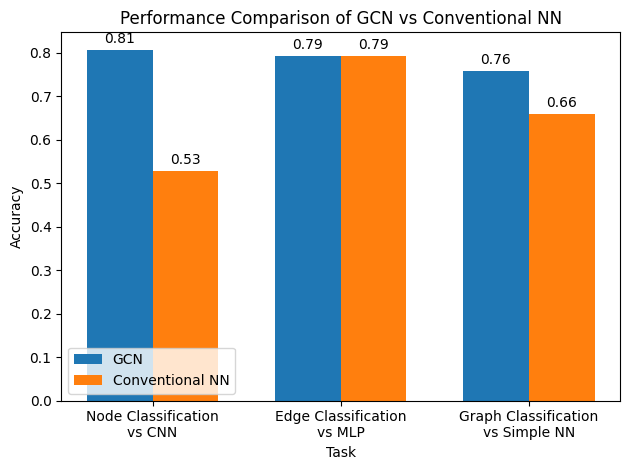

In [47]:
# Data
tasks = ['Node Classification\nvs CNN', 'Edge Classification\nvs MLP', 'Graph Classification\nvs Simple NN']
gcn_accuracies = [GCN_Node_accuracy, GCN_Link_accuracy, GCN_graph_accuracy]  
nn_accuracies = [CNN_Node_accuracy, MLP_Link_accuracy, Simple_NN_graph_accuracy]  

# Positions for the bars
x = np.arange(len(tasks))
width = 0.35  # Width of the bars

# Plot
fig, ax = plt.subplots()

# Bars for GCN and Conventional NN
bars1 = ax.bar(x - width/2, gcn_accuracies, width, label='GCN')
bars2 = ax.bar(x + width/2, nn_accuracies, width, label='Conventional NN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Task')
ax.set_ylabel('Accuracy')
ax.set_title('Performance Comparison of GCN vs Conventional NN')
ax.set_xticks(x)
ax.set_xticklabels(tasks)
ax.legend(loc='lower left')

# Add labels to bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

fig.tight_layout()

plt.show()
